In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0


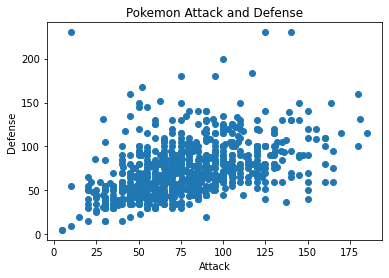

In [2]:
plt.scatter(df.attack, df.defense)
plt.title('Pokemon Attack and Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

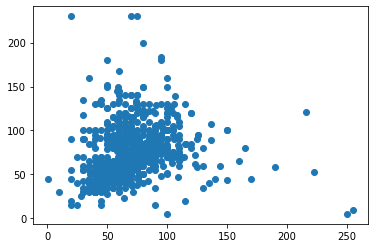

In [ ]:
plt.scatter(df.hp, df.defense)
plt.show()

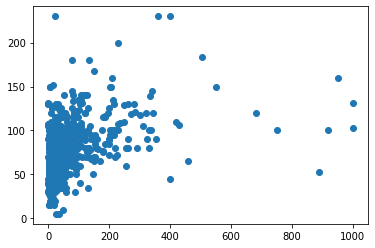

In [ ]:
plt.scatter(df.weight_kg, df.defense);

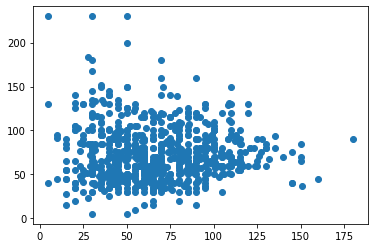

In [ ]:
plt.scatter(df.speed, df.defense);

In [ ]:
df.corr()

,weight_kg,hp,attack,defense,speed,generation,is_legendary
weight_kg,1.000000,0.427743,0.382183,0.424067,0.051384,0.085767,0.393023
hp,0.427743,1.000000,0.410616,0.242378,0.160760,0.074065,0.308405
attack,0.382183,0.410616,1.000000,0.468915,0.352703,0.101375,0.303295
defense,0.424067,0.242378,0.468915,1.000000,0.007934,0.057603,0.265587
speed,0.051384,0.160760,0.352703,0.007934,1.000000,-0.019914,0.311639
generation,0.085767,0.074065,0.101375,0.057603,-0.019914,1.000000,0.139029
is_legendary,0.393023,0.308405,0.303295,0.265587,0.311639,0.139029,1.000000


In [5]:
def bivstats(df, label, feature):
  from scipy import stats
  import pandas as pd
  import matplotlib.pyplot as plt

  # Calculate the regression line
  m, b, r, p, err = stats.linregress(df[feature], df[label])

  # Create the index used for the line plot by using the range function from
  # zero to the max value of the numeric feature
  num = df[feature].max()
  nums = range(num)

  # This line plot requires(index list, slope * index list + y-intercept, line format)
  # For a complete list of line formats: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
  plt.plot(nums,m * nums + b,"r--")

  # Add the formula, r squared, and p-value to the figure
  textstr  = 'y  = ' + str(round(m, 2)) + 'x + ' + str(round(b, 2)) + '\n'
  textstr += 'r2 = ' + str(round(r**2, 2)) + '\n'
  textstr += 'p  = ' + str(round(p, 2))
  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)

  plt.scatter(df[feature], df[label])
  plt.title(f'Pokemon {feature} and {label}')
  plt.xlabel(feature)
  plt.ylabel(label)
  plt.show()




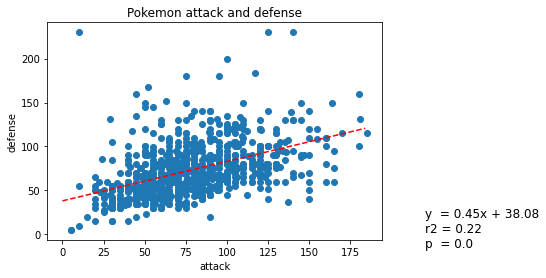

In [6]:
bivstats(df, 'defense', 'attack')

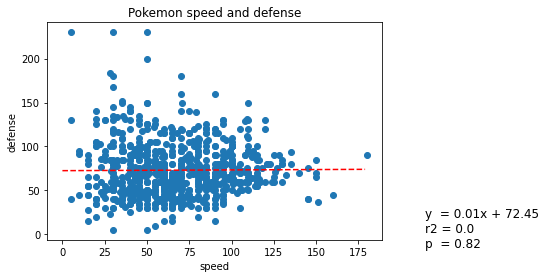

In [7]:
bivstats(df, 'defense', 'speed')

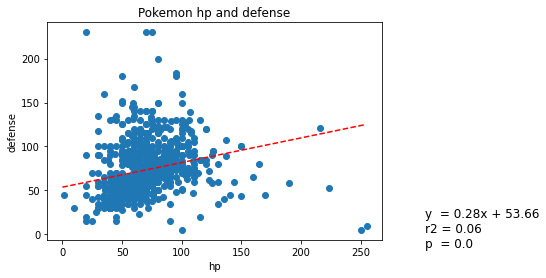

In [9]:
bivstats(df, 'defense', 'hp')

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

# Fit the OLS model: ols(formula='[label]~[feature]', data=df).fit()
model = ols(formula='SalePrice~TotalSF', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,LM stat,LM p-value,F-stat,F p-value
White,680.167,0.0,635.394,0.0
Breusch-Pagan,306.876,0.0,388.012,0.0


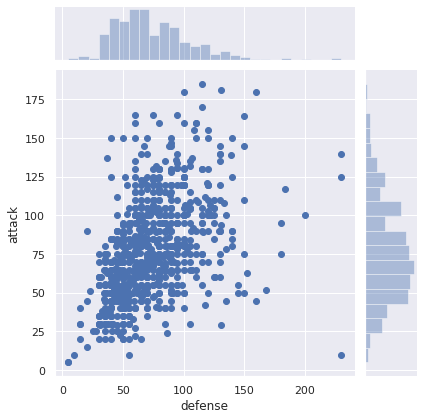

In [11]:
# Jointplot()

import pandas as pd
import seaborn as sns

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

sns.set(color_codes=True)
sns.jointplot(x='defense', y='attack', data=df)

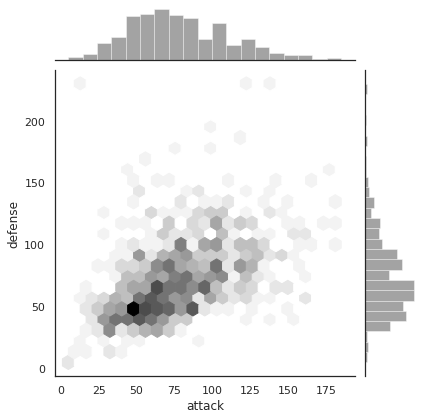

In [12]:
with sns.axes_style("white"):
  sns.jointplot(data=df, x='attack', y='defense', kind="hex", color="k");

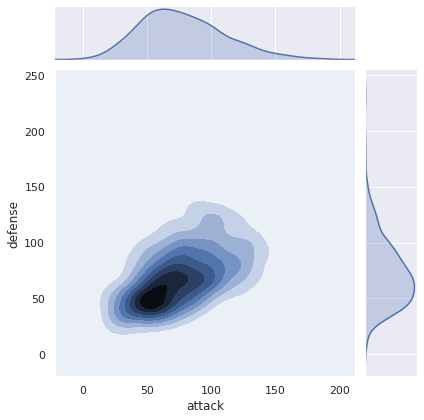

In [15]:
# Kernel density plot

sns.jointplot(data=df, x="attack", y="defense", kind="kde");

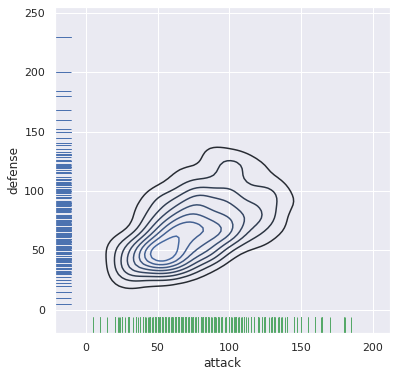

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.attack, df.defense, ax=ax)
sns.rugplot(df.attack, color="g", ax=ax)
sns.rugplot(df.defense, vertical=True, ax=ax);

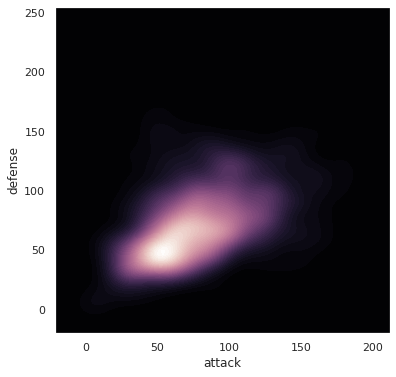

In [17]:
# Deep contour plot

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.attack, df.defense, cmap=cmap, n_levels=60, shade=True);

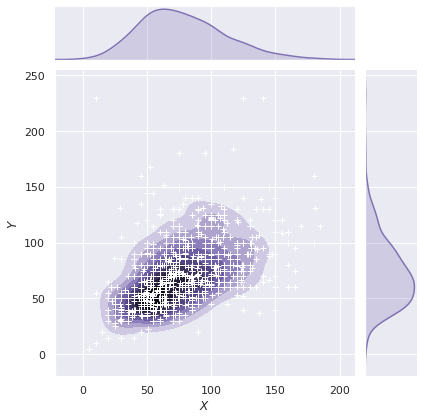

In [18]:
# Multiple layers on the joint grid

g = sns.jointplot(x="attack", y="defense", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

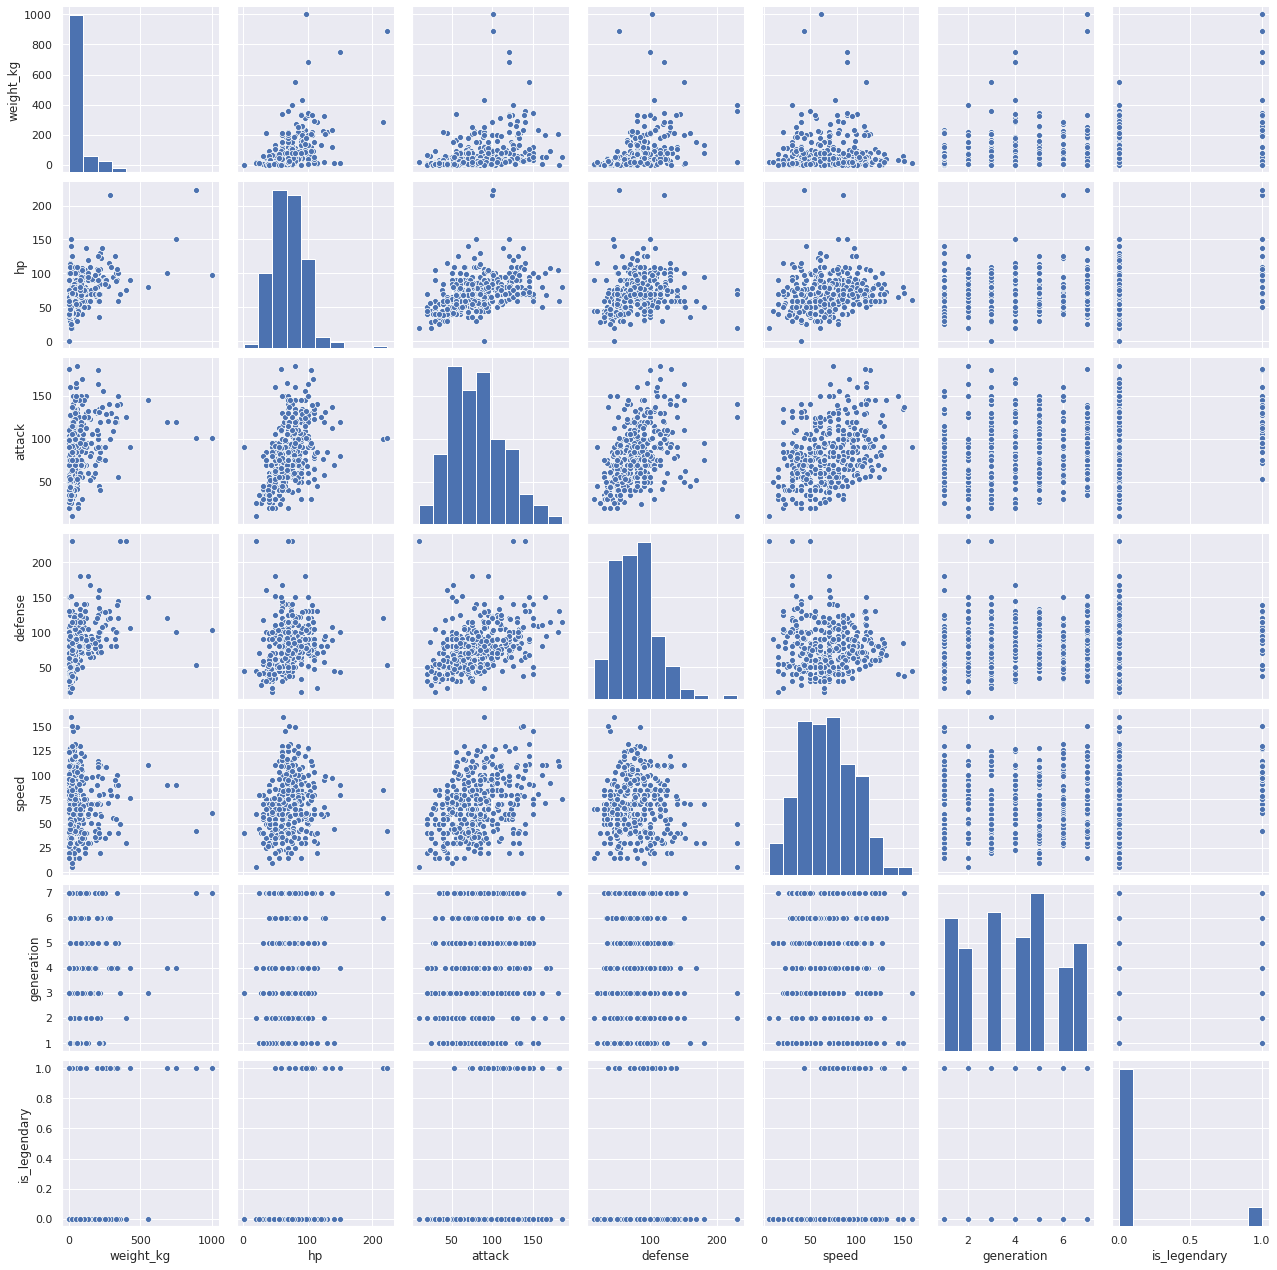

In [19]:
df.dropna(inplace=True) # remove null values first
sns.pairplot(df);

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: Runtim

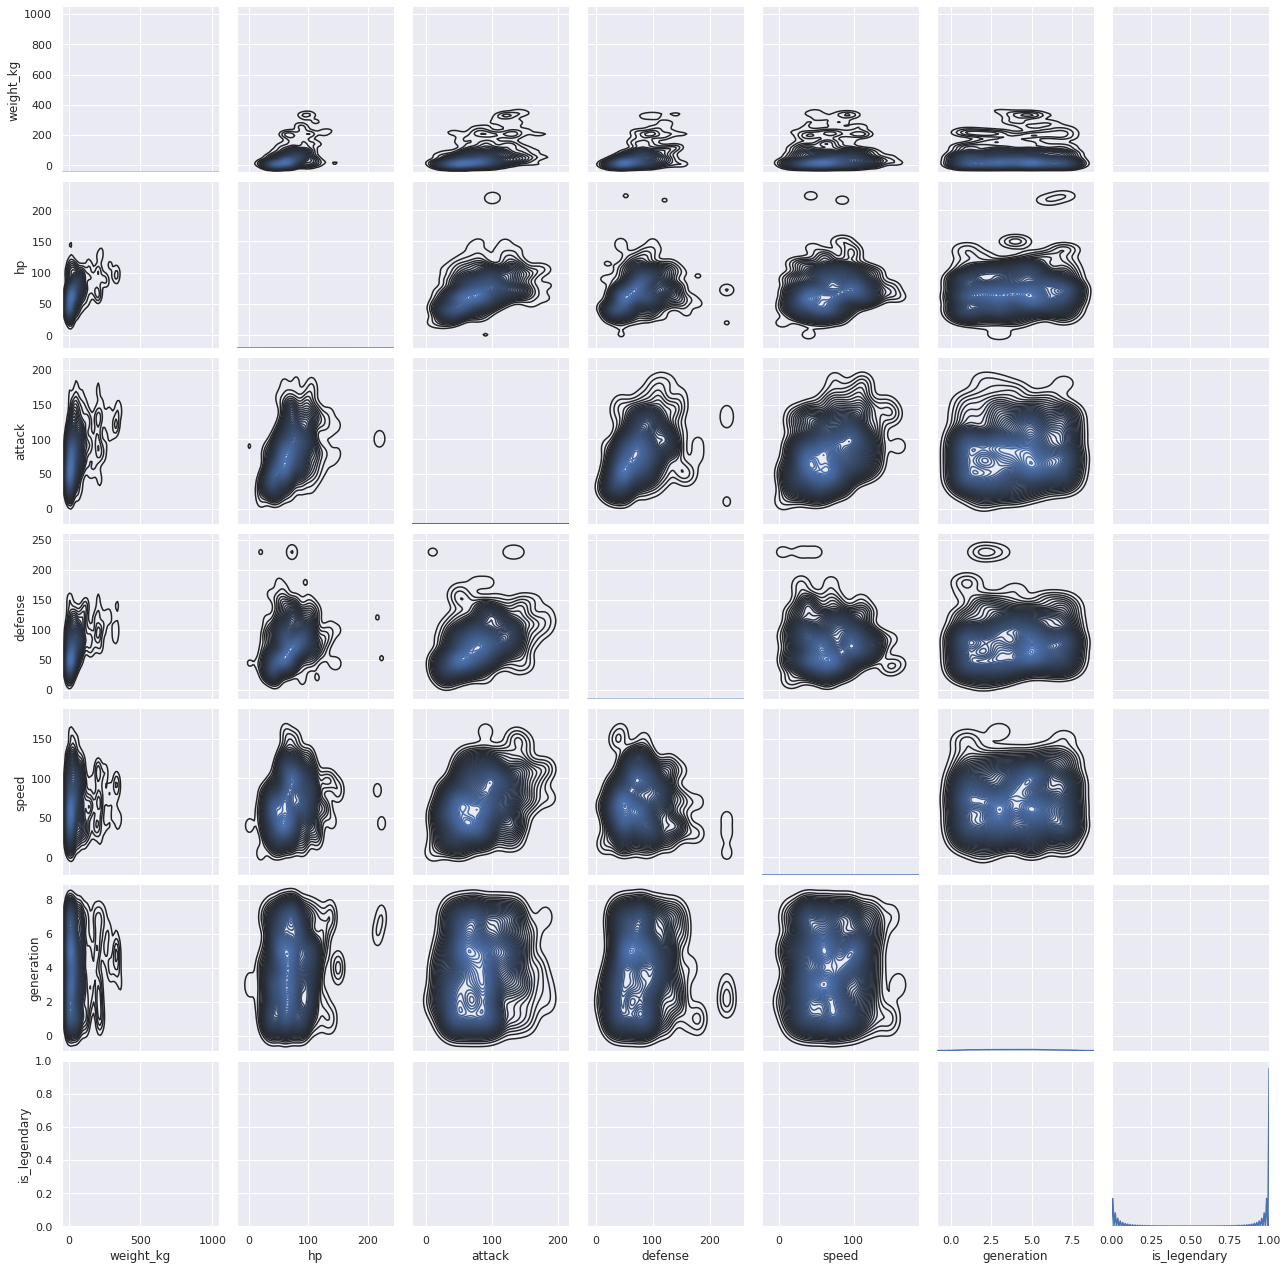

In [20]:
# Customize the pairplot() by writing to PairGrid

g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=60);

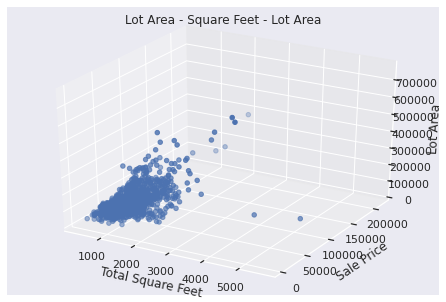

In [22]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/housing.csv')

import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#The following two lines change the font size of matplotlib
font = {'size': 8}
matplotlib.rc('font', **font)

fig = plt.figure()
three_d_plot = Axes3D(fig)
three_d_plot.scatter(df.TotalSF, df.LotArea, df.SalePrice)
three_d_plot.set_title('Lot Area - Square Feet - Lot Area')
three_d_plot.set_xlabel('Total Square Feet')
three_d_plot.set_ylabel('Sale Price')
three_d_plot.set_zlabel('Lot Area')

plt.show()

In [27]:
# IMPORTANT: you will run into problems if you try to run interactive visualizations in the same notebook as 2d visuzliations
# Therefore, run this code in a new .ipynb file

import pandas as pd
import plotly.express as px

data = pd.read_csv('http://www.ishelp.info/data/insurance.csv')

# Notice how easy: pass in the DataFrame and the names of the x, y, and z variables (all must be numeric)
fig = px.scatter_3d(data, x='age', y='charges', z='bmi', color='smoker', symbol='sex', size='children')
fig.show()